In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Note: The following do not work with Python 3.12
#import sweetviz as sv
#import shap
#from ydata_profiling import ProfileReport


In [7]:
seed = 2024

# pandas, statsmodels, matplotlib and y_data_profiling rely on numpy's random generator, and thus, we need to set the seed in numpy
np.random.seed(seed)

In [8]:
# load the data

diet = pd.read_csv('data/diet.csv')

In [9]:
# have a look at the data and its attributes
print(diet.sample(10))

# check if columns are properly named
# ---> yes

           AuthorId        Diet  Age
168659     2207556C  Vegetarian   74
206750      338571E  Vegetarian   36
4498       1063960D  Vegetarian   23
183825     2552022E       Vegan   33
177513      240154D  Vegetarian   28
16133      1222204E    Omnivore   64
23656      1324508B       Vegan   71
173830     2321250B    Omnivore   35
239673      620403B    Omnivore   67
146412  2002298125D  Vegetarian   41


In [10]:
# get a general overview over data, check for missing values, etc.
print(diet.info())

print(diet.isna().any())

# --> we have 271907 rows, and Diet has one missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271907 entries, 0 to 271906
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   AuthorId  271907 non-null  object
 1   Diet      271906 non-null  object
 2   Age       271907 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 6.2+ MB
None
AuthorId    False
Diet         True
Age         False
dtype: bool


Text(0.5, 1.0, 'Died distribution')

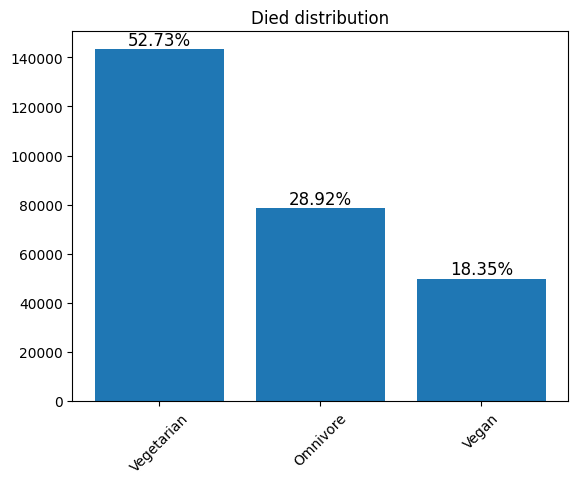

In [11]:
counts = diet['Diet'].value_counts()

plt.bar(counts.index, counts.values)
plt.xticks(rotation=45)
for i, v in enumerate(counts.values):
    plt.text(i, v, "{:.2f}%".format(v / len(diet) * 100), ha="center", va="bottom", fontsize=12)
plt.title('Died distribution')

In [12]:
# Clean data
# replace missing value in Diet with "Omnivore"

print(diet["Diet"].unique())
diet["Diet"] = diet["Diet"].fillna("Omnivore")




['Vegetarian' 'Vegan' 'Omnivore' nan]


In [13]:
# Change data type of Diet to category
diet["Diet"] = diet["Diet"].astype("category")


In [14]:
#Check

diet.head(10)


,AuthorId,Diet,Age
0,10000120E,Vegetarian,46
1,1000014D,Vegan,18
2,1000015A,Vegetarian,58
3,1000016E,Vegetarian,32
4,1000027E,Vegan,61
5,1000029E,Vegan,39
6,1000036C,Vegetarian,50
7,1000048E,Vegetarian,44
8,1000079B,Vegetarian,34
9,1000107C,Omnivore,62


In [15]:
#Check
diet.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271907 entries, 0 to 271906
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   AuthorId  271907 non-null  object  
 1   Diet      271907 non-null  category
 2   Age       271907 non-null  int64   
dtypes: category(1), int64(1), object(1)
memory usage: 4.4+ MB


In [20]:
# Outlier detection

def detect_outliers_iqr(data, column, threshold=1.5):
    """
    Parameters:
    - data (DataFrame): The input DataFrame.
    - column (str): The name of the column to detect outliers in.
    - threshold (int): The number of interquartile ranges above the third quartile

    Returns:
    - outliers (DataFrame): A DataFrame containing the outliers found in the specified column.

    The quartiles could be modified to set a different threshold for outliers detection.
    For example, to detect outliers that are 3 times the interquartile range below the first quartile
    """
    # Calculate Q1, Q3 and IQR
    q1 = np.percentile(data[column], 25)
    q3 = np.percentile(data[column], 75)
    iqr = q3 - q1
    lower_bound = q1 - threshold * iqr
    upper_bound = q3 + threshold * iqr
    # outlier is below the lower bound or above the upper bound
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Detect outliers for the 'Time' column
outliers_age = detect_outliers_iqr(diet, 'Age')
print("Outliers in 'Age' column:")
print(outliers_age)

# how many outliers are there?
print("Number of outliers in 'Age' column:")
print(len(outliers_age))
# how much compared to the total number of rows?
print("Percentage of outliers in 'Age' column:")
print(len(outliers_age) / len(diet) * 100)

print("Min age:",diet["Age"].min())
print("Max age:", diet["Age"].max())


Outliers in 'Age' column:
Empty DataFrame
Columns: [AuthorId, Diet, Age]
Index: []
Number of outliers in 'Age' column:
0
Percentage of outliers in 'Age' column:
0.0
Min age: 18
Max age: 79
